In [44]:
import pandas as pd
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb 
import pyAgrum.lib.image as gnbimage
from IPython.display import Image


ModuleNotFoundError: No module named 'cairosvg'

In [24]:
def _readData(filename: str='both_test_balanced.csv'):
    df = pd.read_csv(filename)
    #to prevent errors when we save as an image
    df.columns = [
        column.replace(" ","").replace("-","_").strip() for column in df.columns
    ]
    # class atribut represente positivity of the subject
    df.rename(columns={"Class":"Positif"}, inplace=True)
    df.drop("Areyouahealthprofessional?", inplace=True, axis=1)
    return df

In [25]:
def _learnData(df, bn, algorithm, *args, **kwargs):
    learner = gum.BNLearner(df, bn)
    algorithm(learner, *args, **kwargs)
    return learner.learnBN()

In [26]:
#load data from csv
df = _readData()
df.head(6)

,Symptom_ThroatPain,Symptom_Dyspnea,Symptom_Fever,Symptom_Cough,Symptom_Headache,Symptom_TasteDisorders,Symptom_OlfactoryDisorders,Symptom_Coryza,Gender,Positif
0,0,1,0,0,1,1,1,1,1,0
1,1,1,1,1,1,0,0,1,0,0
2,0,1,0,0,0,0,0,1,1,0
3,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0
5,1,1,1,1,1,0,0,1,0,0


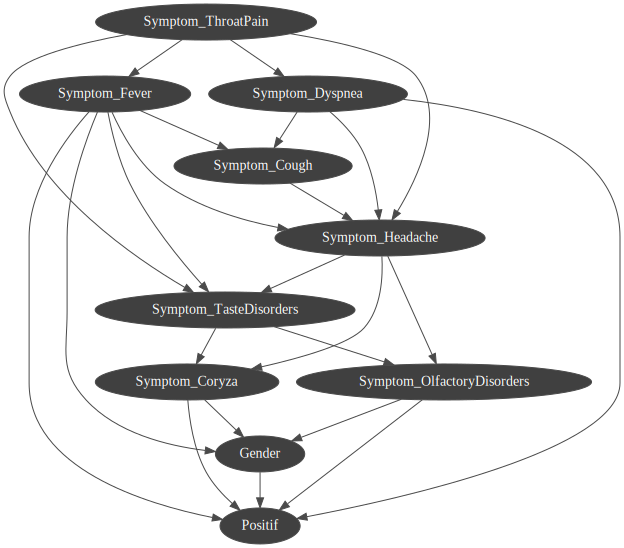

In [31]:
# create a bayesnetword from the loaded data
bayesnet = gum.BayesNet("Barzilian covid data")
nodes = {col: bayesnet.add(gum.LabelizedVariable(col,col, 2)) for col in df.columns}

# learn the bn from the data
bn = _learnData(df, bayesnet, gum.BNLearner.useK2, [*nodes.values()])
gnb.showBN(bn, size="10")
gum.saveBN(bn, "out/covid.net")
#creation d'une image
gnbimage.export(bn,"out/covid1.png")

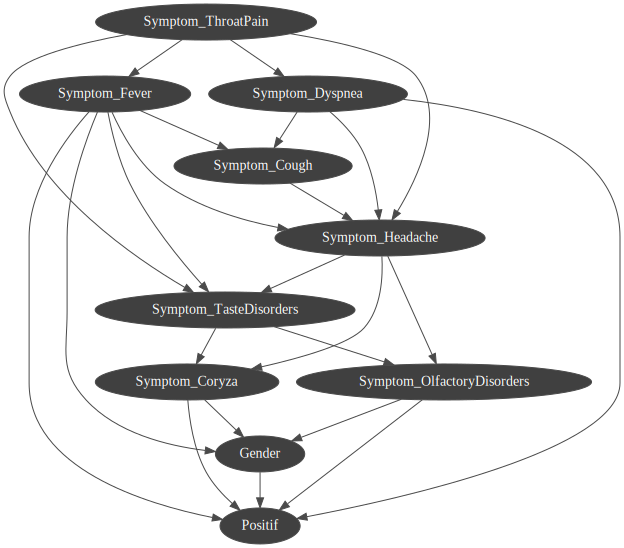

In [28]:
#2nd learning algorithm
# learn the bn from the data
bn = _learnData(df, bayesnet, gum.BNLearner.useGreedyHillClimbing
gnb.showBN(bn, size="10")
gum.saveBN(bn, "out/covid.net")
#creation d'une image
gnbimage.export(bn,"out/covid.png")

In [32]:
#3rd learning algorithm
# learn the bn from the data
#bn = _learnData(df, bayesnet, gum.BNLearner.useLocalSearchWithTabuList)
#gnb.showBN(bn, size="10")
#creation d'une image
#gnbimage.export(bn,"out/covid3.png")

In [33]:
#Probabilités des cas données
# Le sujet souffre du mal de tete
gnb.showPotential(bn.cpt("Symptom_Headache"))
# Le sujet est tester positif
gnb.showPotential(bn.cpt("Positif"))

# add another symptome

In [34]:
#Probabilités par inference
def _showInference(bn, target, evs=None):
    ie = gum.LazyPropagation(bn)
    if evs:
        ie.setEvidence(evs)
    ie.makeInference()
    gnb.showPotential(ie.posterior(target))

In [39]:
# Show inference probabilities
#trouble de l'odorat
_showInference(bn,"Symptom_OlfactoryDisorders")
# trouble de l'odorat sachant qu'il souffre de trouble de gout
_showInference(bn, "Symptom_OlfactoryDisorders", {"Symptom_TasteDisorders":1})
# test positif sachant qu'il souffre de gout, odorat et n'a pas de fievre
_showInference(bn,"Positif",{"Symptom_TasteDisorders":1,"Symptom_OlfactoryDisorders":1,"Symptom_Fever":0})

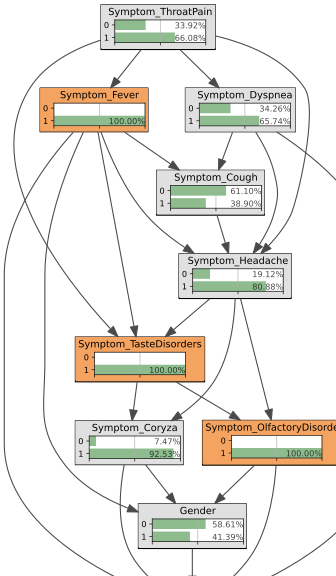

ModuleNotFoundError: No module named 'cairosvg'

In [43]:
#show inference graph
sd = gnb.showInference(bn, evs={"Symptom_TasteDisorders":1,"Symptom_OlfactoryDisorders":1,"Symptom_Fever":1})
# TODO need to export the inference graph as img